In [3]:
# Importing the necessary libraries.
import numpy as np
import keras
import keras.backend as k
import cv2
import datetime
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator


In [4]:
# Constructing the layers of CNN model.
# Input shape of 150x150 pixels.

model=Sequential()
model.add(Conv2D(100, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='softmax'))




# Compiling the model. 
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Augmenting the images of training set.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Rescaling the RGB values of the test set images.
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading and preprocessing the images of dataset.
training_set = train_datagen.flow_from_directory('FaceMaskDetector-master/train',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

test_set = test_datagen.flow_from_directory('FaceMaskDetector-master/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [6]:
# Creating the checkpoint i.e. which model is to be saved.
model_path = "mask_model.h5"

checkpoint = ModelCheckpoint(model_path, 
                             monitor = 'val_accuracy', 
                             verbose = 1,
                             save_best_only = True, 
                             mode = 'max')

callbacks_list = [checkpoint]

In [7]:
# Training the model for 10 iterations (epochs) over 83 batches of data (each batch has 16 images).
model_saved=model.fit_generator(training_set,
                                epochs=30,
                                validation_data=test_set,
                                callbacks = callbacks_list)

model.save('mask_model.h5',model_saved)

/home/prachi/anaconda3/envs/py3.7.6/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
83/83 [==============================] - 69s 805ms/step - loss: 0.9477 - accuracy: 0.5043 - val_loss: 0.1985 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to git_model2.h5
Epoch 2/30
83/83 [==============================] - 64s 765ms/step - loss: 0.2106 - accuracy: 0.4995 - val_loss: 0.2812 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/30
83/83 [==============================] - 73s 880ms/step - loss: 0.1815 - accuracy: 0.5062 - val_loss: 0.1198 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/30
31/83 [==========>...................] - ETA: 45s - loss: 0.0938 - accuracy: 0.5454

KeyboardInterrupt: 

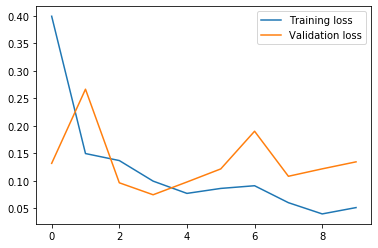

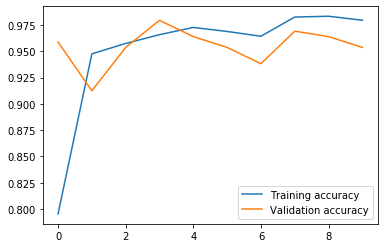

In [9]:
# Plotting the loss.
plt.plot(model_saved.history['loss'], label='Training loss')
plt.plot(model_saved.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plotting the accuracy.
plt.plot(model_saved.history['accuracy'], label='Training accuracy')
plt.plot(model_saved.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0